In [40]:
from crop_row_detection import ExG, skeleton
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import DBSCAN

In [41]:
# Definitions

TRD_PATH = '../resources/therosariodataset/sequence03_selected/'
TRD_FILES = [
    'left_1514557404.402000.png', 'left_1514557432.437000.png', 'left_1514557475.010000.png',
    'left_1514557504.408000.png', 'left_1514557528.874000.png', 'left_1514557564.762000.png',
    'left_1514557578.585000.png', 'left_1514557602.532000.png', 'left_1514557604.999000.png',
]

Z22_PATH = '../resources/zavalla2022/'
Z22_FILES = [
    'left0807.jpg', 'left1187.jpg', 'left1492.jpg',
    'left1550.jpg', 'left1750.jpg', 'left1876.jpg',
]

Z23_PATH = '../resources/zavalla2023/'
Z23_FILES = [
    'left0034.jpg', 'left0162.jpg', 'left0387.jpg',
    'left0707.jpg', 'left0810.jpg',
]

SAVE_IMAGES = False
SAVE_PATH = 'resources/results/'
if SAVE_IMAGES:
    os.makedirs(SAVE_PATH, exist_ok=True)

In [42]:
# Read images
def read_images(path, imlist):
    images = []
    for imname in imlist:
        img = cv2.imread(path+imname)
        images.append(img)
    return images

# Make a gridplot of the images
def plot_images_grid(imlist, step=3, cvtcolor=False):
    rows = -(len(imlist) // -step)  # ceiling = upside-down floor
    fig, axs = plt.subplots(rows, step)
    for i,img in enumerate(imlist):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if cvtcolor else img
        axs[i//step, i%step].imshow(img)
        axs[i//step, i%step].axis('off')
    return fig, axs


## Original Images

/tmp/ipykernel_55508/3383977010.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_55508/3383977010.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_55508/3383977010.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


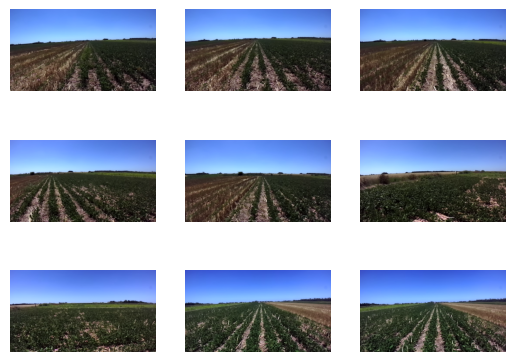

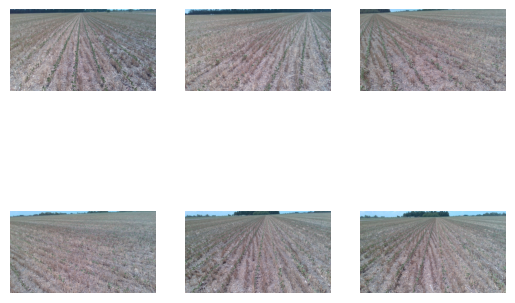

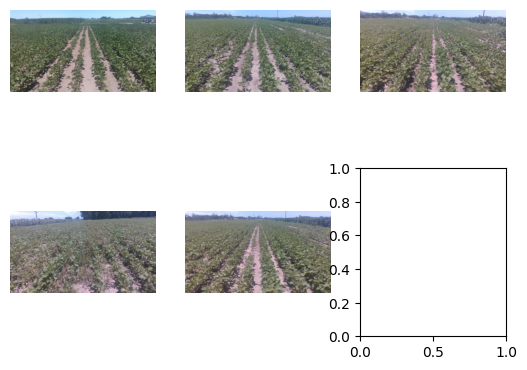

In [43]:
# The Rosario Dataset
trd_images = read_images(TRD_PATH, TRD_FILES)
fig, axs = plot_images_grid(trd_images, cvtcolor=True)
fig.show()

# Zavalla 2022
z22_images = read_images(Z22_PATH, Z22_FILES)
fig, axs = plot_images_grid(z22_images, cvtcolor=True)
fig.show()

# Zavalla 2023
z23_images = read_images(Z23_PATH, Z23_FILES)
fig, axs = plot_images_grid(z23_images, cvtcolor=True)
fig.show()

## Crop Row Detection

### Excess Green Vegetation Index (ExG)

Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG


/tmp/ipykernel_55508/48432291.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG
Index: ExG


/tmp/ipykernel_55508/48432291.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_55508/48432291.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Index: ExG
Index: ExG


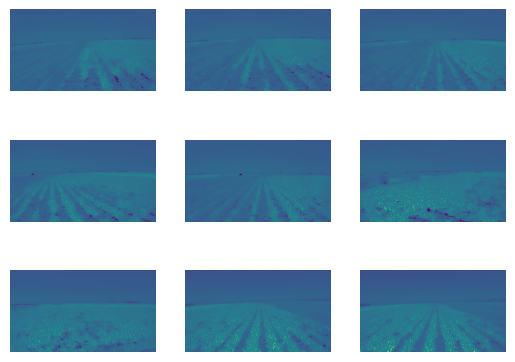

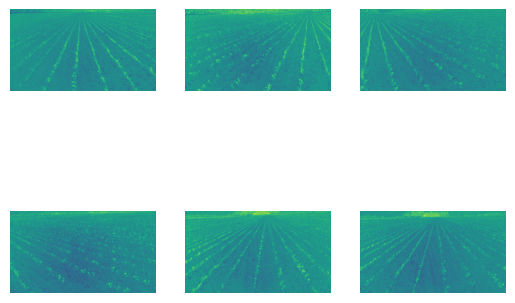

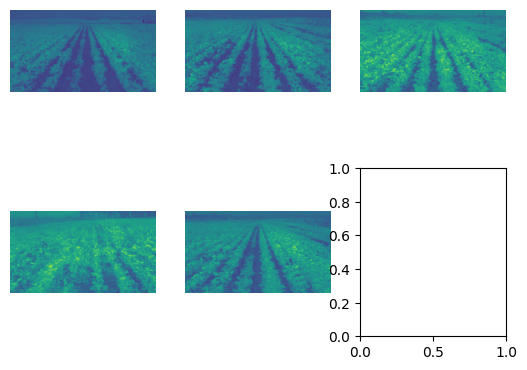

In [44]:
# The Rosario Dataset
trd_exg = []
for img in trd_images:
    i_img = ExG(img)
    trd_exg.append(i_img)
fig, axs = plot_images_grid(trd_exg)
fig.show()

# Zavalla 2022
z22_exg = []
for img in z22_images:
    i_img = ExG(img)
    z22_exg.append(i_img)
fig, axs = plot_images_grid(z22_exg)
fig.show()

# Zavalla 2023
z23_exg = []
for img in z23_images:
    i_img = ExG(img)
    z23_exg.append(i_img)
fig, axs = plot_images_grid(z23_exg)
fig.show()

### Otsu + Closing + Skeleton + Dilation

/tmp/ipykernel_55508/280302251.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_55508/280302251.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_55508/280302251.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


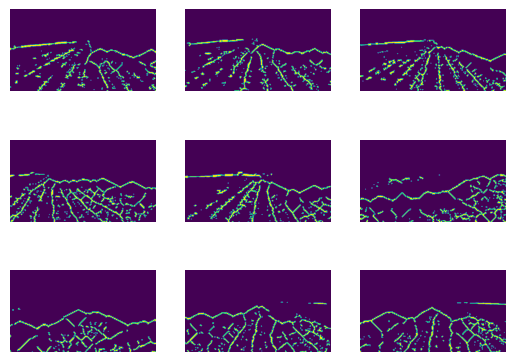

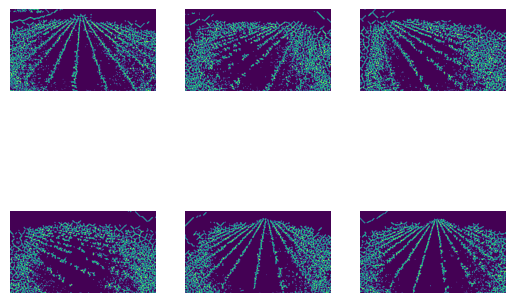

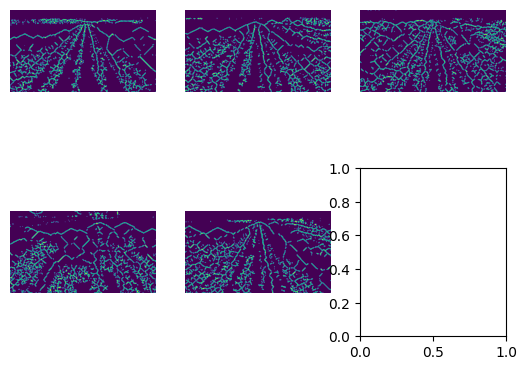

In [45]:
# The Rosario Dataset
trd_skeleton = []
for img in trd_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    trd_skeleton.append(i_skele)
fig, axs = plot_images_grid(trd_skeleton)
fig.show()

# Zavalla 2022
z22_skeleton = []
for img in z22_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    z22_skeleton.append(i_skele)
fig, axs = plot_images_grid(z22_skeleton)
fig.show()

# Zavalla 2023
z23_skeleton = []
for img in z23_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    z23_skeleton.append(i_skele)
fig, axs = plot_images_grid(z23_skeleton)
fig.show()

### Hough Lines

In [46]:
#TODO